### CNN image classification->Binary

In [6]:
import tensorflow as tf
import os

In [7]:
gpus=tf.config.experimental.list_physical_devices('GPU')

In [8]:
len(gpus)

0

In [9]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
##remove all the irrelant images
import cv2
import imghdr
import matplotlib.pyplot as plt


In [12]:
# ##first uploading zip file then running the following code to unzip the zip file in the content folder
# import zipfile
# import os
# import shutil

# # Path to the zip file on your Google Drive
# zip_file_path = '/happy.zip'

# # Path to the desired location where you want to move the contents
# desired_location = '/data/'

# # Unzip the folder
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall('/data/')

# # Get the name of the unzipped folder (assuming there's only one folder)
# unzipped_folder_name = os.listdir('/data/')[0]

# # Move the contents to the desired location
# source_path = '/data/' + unzipped_folder_name
# destination_path = desired_location + unzipped_folder_name

# shutil.move(source_path, destination_path)

# print("Unzipping and moving completed successfully!")

In [23]:
data_dir='/data'

In [24]:
os.listdir(data_dir)

['happy', 'sad']

In [ ]:
##all the happy images
# os.listdir(os.path.join(data_dir, 'happy'))

In [8]:
img_ext=['jpg', 'jpeg', 'bmp', 'png']

#### Remove all the irrelant images

In [26]:
for img_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, img_class)):
    image_path=os.path.join(data_dir, img_class, image)
    try:
      img=cv2.imread(image_path)
      tip=imghdr.what(image_path)
      if tip not in img_ext:
        print('image not in ext list {}'. format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'. format(image_path))


image not in ext list /data/happy/smiling-young-african-american-woman-260nw-2290057229.jpg
image not in ext list /data/happy/traitshappypeople.jpg
image not in ext list /data/happy/guilherme-stecanella-375176-unsplash.jpg
image not in ext list /data/happy/depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
image not in ext list /data/happy/Happy20People.jpg
image not in ext list /data/happy/1282554-kids.webp
image not in ext list /data/sad/sad-young-man-bedroom-people-260nw-2274946189.jpg
image not in ext list /data/sad/portrait-man-sad-mood-people-260nw-1024988086.jpg
image not in ext list /data/sad/Sad-man-sitting-in-bedroom-thumbnail-732x549.jpg
image not in ext list /data/sad/depositphotos_217564870-stock-photo-young-attractive-sad-black-african.jpg
image not in ext list /data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
image not in ext list /data/sad/l-crying-while-sitting-on-the-floor-in-dark-room-with-an-attitude-of-sadness.jpg
image not in ext li

### Load the Data

In [28]:
# tf.data.Dataset??

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# tf.keras.utils.image_dataset_from_directory??

In [32]:
##building the data pipeline
data=tf.keras.utils.image_dataset_from_directory('/data')

Found 163 files belonging to 2 classes.


In [34]:
##to access the data pipeline
data_iterator=data.as_numpy_iterator()

In [35]:
##Get the batch of data
batch=data_iterator.next()

In [37]:
##len-2->images, labels
len(batch)

2

In [39]:
##images represented as numpy array
batch[0].shape #batch size of 32,image size of 256x256 of rgb

(32, 256, 256, 3)

In [40]:
# ## to modify the batch size or image size
# tf.keras.utils.image_dataset_from_directory('/data', batch_size=16, image_size=(128,128))

In [41]:
##Class 1->Sad people,Class 0->Happy people
batch[1]

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

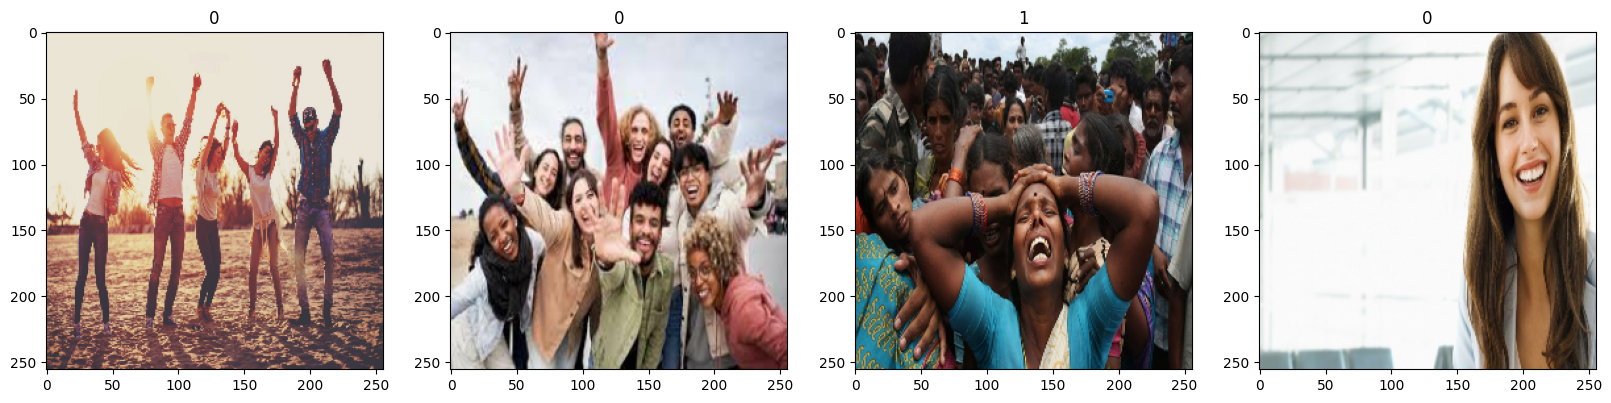

In [43]:
##from the pics we can see 0/1 is for which categories
##0->Happy, 1->Sad
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]): #taking 4 images
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

### Preprocess the data
#### 1. Scale the data
#### 2. Split the data

In [48]:
# batch[0]#for images
# batch[1] #for labesl

In [53]:
##image pixel vales lies between 0 and 255
print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [55]:
##divide the values by 255 to scale the data
scaled=batch[0] / 255

In [58]:
##min and max value of scaled data->0 and 1 respectively
print(scaled.min())
print(scaled.max())

0.0
1.0


#### scale the data

In [59]:
##scaling/transformation of the data in pipeline
#x->independent variable, y->target variable
data=data.map(lambda x,y:  (x/255, y))

In [64]:
scaled_iterator=data.as_numpy_iterator()

In [65]:
batch=scaled_iterator.next()

In [68]:
batch[0].max()

1.0

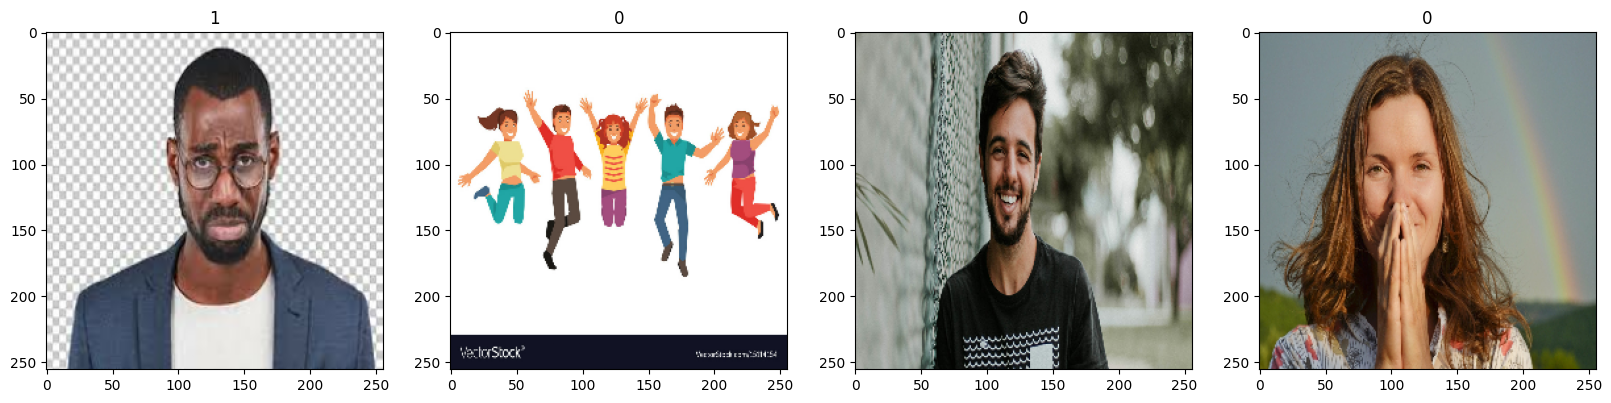

In [67]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]): #taking 4 images
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

#### Split the data

In [70]:
##6 batches
len(data)

6

In [71]:
6*.7 # 4 batches to train

4.199999999999999

In [76]:
train_size=int(len(data)*.7) #70% of the data
val_size=int(len(data)*.2) #20% of the daa
test_size=int(len(data)*.1)+1#10% of the data

In [77]:
##total 6 batch
print(train_size, val_size, test_size)

4 1 1


In [78]:
##finally taking different batches of the data for train,validation and test
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [80]:
print(len(train), len(val), len(test))

4 1 1


## Deep Model

In [82]:
#import all the neccessary packages
from tensorflow.keras.models import Sequential #for one i/p and one o/p
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [85]:
# MaxPooling2D??

In [83]:
model=Sequential()

In [86]:

model.add(Conv2D(16, (3,3), 1,  activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

##fully connected layers
model.add(Dense(256,  activation='relu'))
model.add(Dense(1, activation='sigmoid')) #we'll get single output


In [87]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [91]:
# 30*30*16

In [89]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

#### Train the model

In [93]:
##log directory/logs folder
logdir='logs'

In [95]:
tesnsorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [98]:
##can do the early stopping

In [99]:
##fit the model
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tesnsorboard_callback])

Epoch 1/20
4/4 [==============================] - 3s 585ms/step - loss: 0.0898 - accuracy: 0.9609 - val_loss: 0.0644 - val_accuracy: 0.9688
Epoch 2/20
4/4 [==============================] - 4s 901ms/step - loss: 0.0637 - accuracy: 1.0000 - val_loss: 0.0469 - val_accuracy: 1.0000
Epoch 3/20
4/4 [==============================] - 3s 587ms/step - loss: 0.0599 - accuracy: 0.9766 - val_loss: 0.0549 - val_accuracy: 1.0000
Epoch 4/20
4/4 [==============================] - 3s 578ms/step - loss: 0.0470 - accuracy: 1.0000 - val_loss: 0.0442 - val_accuracy: 1.0000
Epoch 5/20
4/4 [==============================] - 4s 898ms/step - loss: 0.0270 - accuracy: 1.0000 - val_loss: 0.0135 - val_accuracy: 1.0000
Epoch 6/20
4/4 [==============================] - 3s 572ms/step - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 7/20
4/4 [==============================] - 3s 586ms/step - loss: 0.0488 - accuracy: 0.9922 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 8/20
4/4 [====

In [100]:
hist.history

{'loss': [0.08977285772562027,
  0.06371866166591644,
  0.05993282049894333,
  0.04699844866991043,
  0.02701675519347191,
  0.01850881054997444,
  0.048774439841508865,
  0.041575122624635696,
  0.022995969280600548,
  0.03760260343551636,
  0.014472438022494316,
  0.011872977949678898,
  0.005018193740397692,
  0.005562592297792435,
  0.0024958066642284393,
  0.0020121722482144833,
  0.001493905670940876,
  0.000893149699550122,
  0.0008145289029926062,
  0.0007995970081537962],
 'accuracy': [0.9609375,
  1.0,
  0.9765625,
  1.0,
  1.0,
  1.0,
  0.9921875,
  0.984375,
  1.0,
  0.9921875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.0643557459115982,
  0.04691191017627716,
  0.05492011457681656,
  0.04415819048881531,
  0.01345052383840084,
  0.019238648936152458,
  0.01632491685450077,
  0.02381899394094944,
  0.02997737191617489,
  0.010699786245822906,
  0.010892392136156559,
  0.002360990270972252,
  0.005484456662088633,
  0.0010063571389

### Plot performance

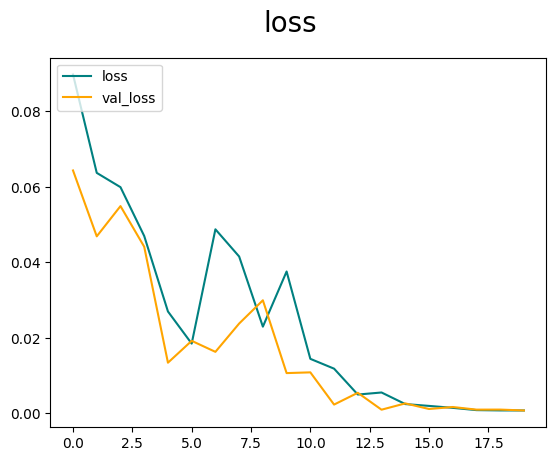

In [101]:
fig=plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

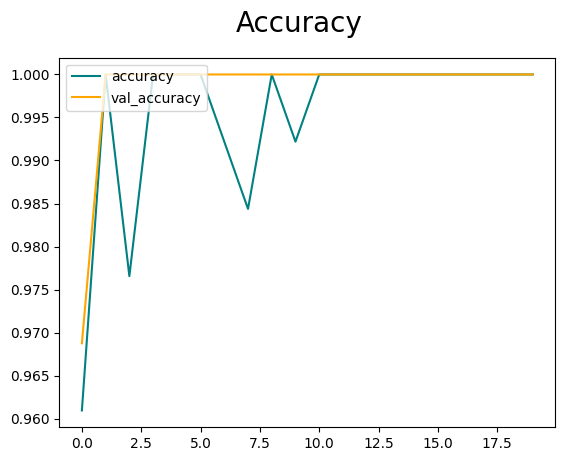

In [102]:
fig=plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### Evaluate the performace

In [2]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [3]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [13]:
#going to each batch of testing data
for batch in test.as_numpy_iterator():
  x, y=batch
  yhat=model.predict(x)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y,yhat)

In [ ]:
print(f'Precision:{pre.result().numpy()},  Recall:{re.result().numpy}, Accuracy:{acc.result().numpy} ')

### Test on new data

In [14]:
import cv2

In [ ]:
img=cv2.imread('xyz.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize=tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
##neurons expects a bach of images not a single image
##expand_dims->by this we are putting the single image array in another array
yhat=model.predict(np.expand_dims(resize/255, 0))

In [ ]:
if yhat>0.5:
  print(f'Predicted calss is Sad')
else:
  print(f'Predicted class is Happy')

### Save the model

In [15]:
from tensorflow.keras.models import load_model

In [ ]:
##save the model
##by serializing it, inside models folder
model.save(os.path.join('models',  'happysadmodel.h5'))

In [ ]:
##to load the model
new_model=load_model(os.path.join('models', 'happysadmodel.h5'))

In [ ]:
##again to predict
yhat_new=new_model.predict(np.expand_dims(resize/255,  0))